In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

# 用電影中死亡人數預測電影評價(IMDB)

In [2]:
FilmData = pd.read_csv('http://files.figshare.com/1332945/film_death_counts.csv')

In [3]:
FilmData.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


## 觀察資料
### 觀察所收集的資料，美國電影分級的情形
美國電影的分級制度 (MPAA_Rating) (不同年代下，電影的分級制度跟命名有略微不同，所以資料集中有些代號不同但是限制的規範是差不多的)
* R：限制級(17歲以下需要陪同父母或成人監護人)
* PG-13：家長須特別注意(可能有13歲以下不適合觀看的內容)
* PG：建議家長指導
* M：建議成熟觀眾觀看
* GP：所有年齡入學 - 家長指導建議
* X：未滿17歲的人不能入場
* G：General Audiences
* NR：未評級
* Approved：已批准，多數出現在1966年以前的電影，在於以前的分級制度是以有沒有批准為分類


Text(0,0.5,'數量')

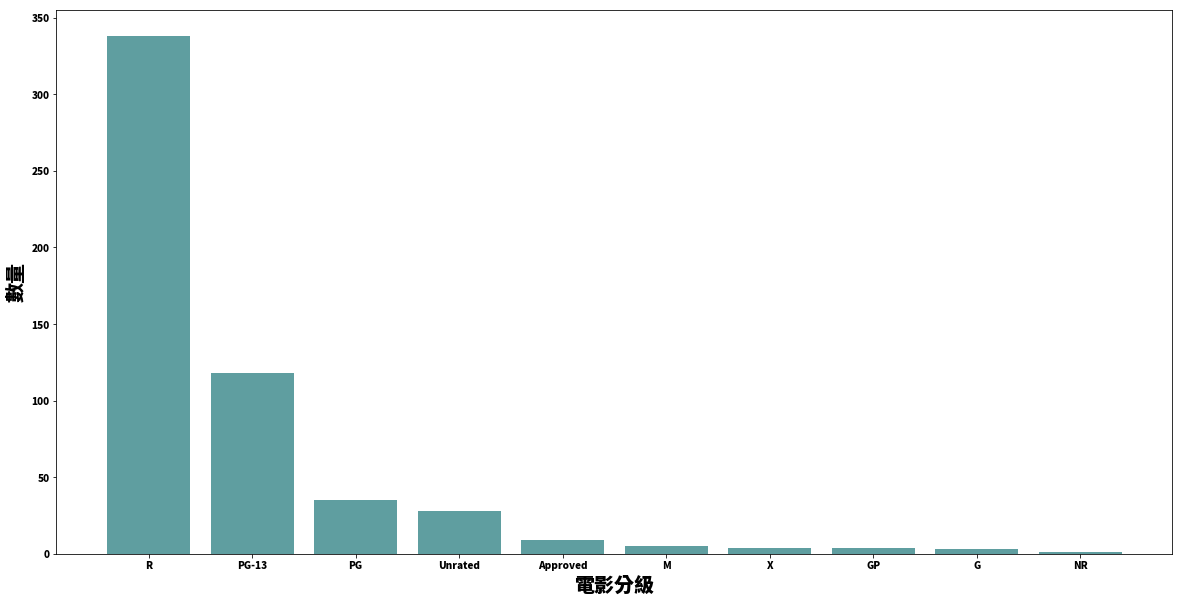

In [3]:
MPAA = pd.value_counts(FilmData.MPAA_Rating)

plt.figure(figsize=(20,10))
plt.bar(np.arange(MPAA.size), MPAA, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(np.arange(MPAA.size), MPAA, color='cadetblue')
plt.xticks(np.arange(MPAA.size), MPAA.index.values, fontsize = 10)
plt.xlabel('電影分級', fontsize = 20)
plt.ylabel('數量', fontsize = 20)


#### 可以觀察到資料中大多數的電影都是限制級的

### 觀察每一年的電影數量

Text(0.5,1,'每年的電影數量')

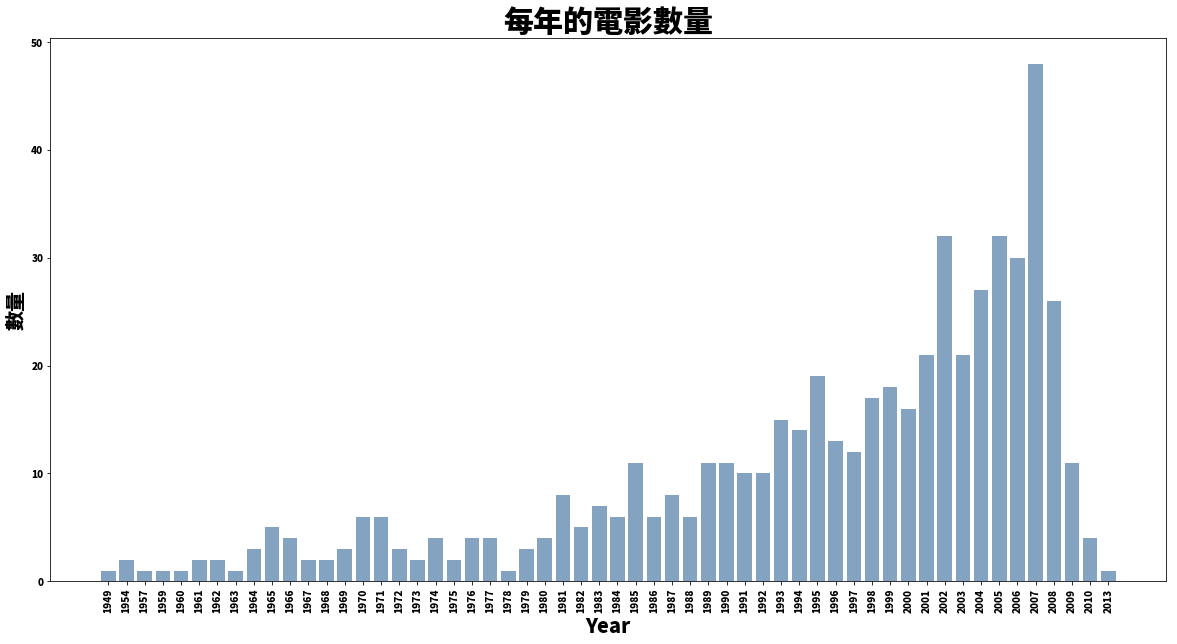

In [4]:
yearCount = pd.value_counts(FilmData.Year).sort_index()

plt.figure(figsize=(20,10))
plt.bar(np.arange(yearCount.size), yearCount, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(yearCount.size), yearCount.index.values, rotation='vertical')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('數量', fontsize = 20)
plt.title('每年的電影數量', fontsize = 30)

#### 2007年的電影數量最多

### 觀察每一年平均電影長度

Text(0.5,1,'每一年平均電影長度')

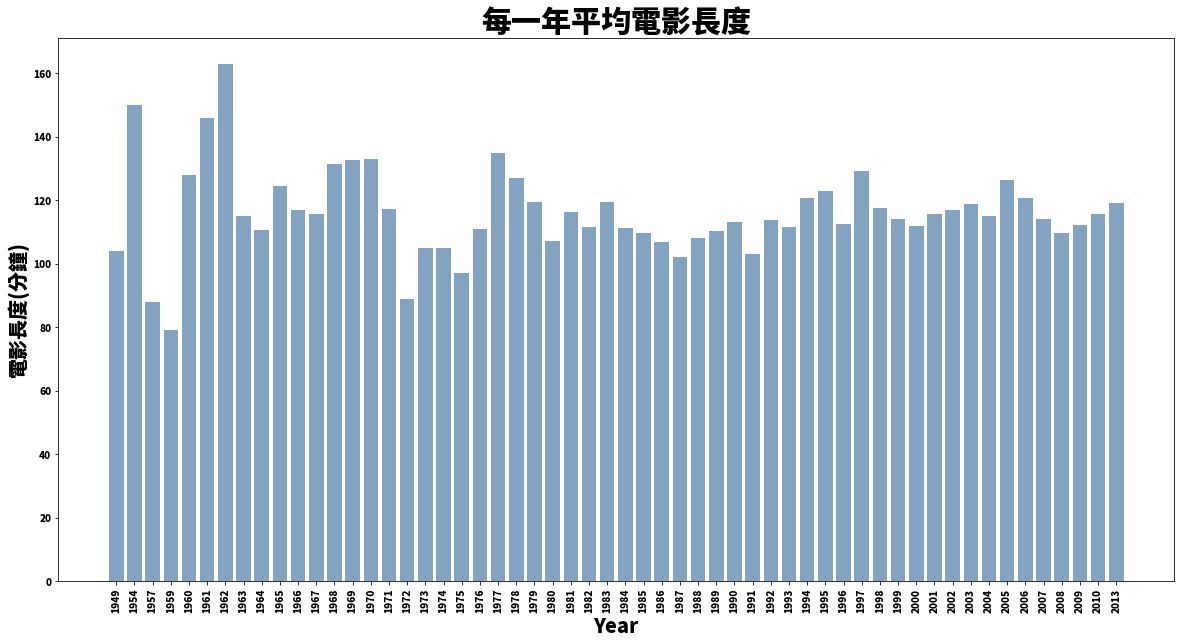

In [5]:
yearSection = FilmData.groupby('Year').mean()
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(yearSection)), yearSection.Length_Minutes, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(len(yearSection)), yearSection.index.values,  rotation='vertical')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('電影長度(分鐘)', fontsize = 20)
plt.title('每一年平均電影長度', fontsize = 30)

### 觀察各年度平均電影裡的死亡人數

Text(0.5,1,'各年度平均電影裡的死亡人數')

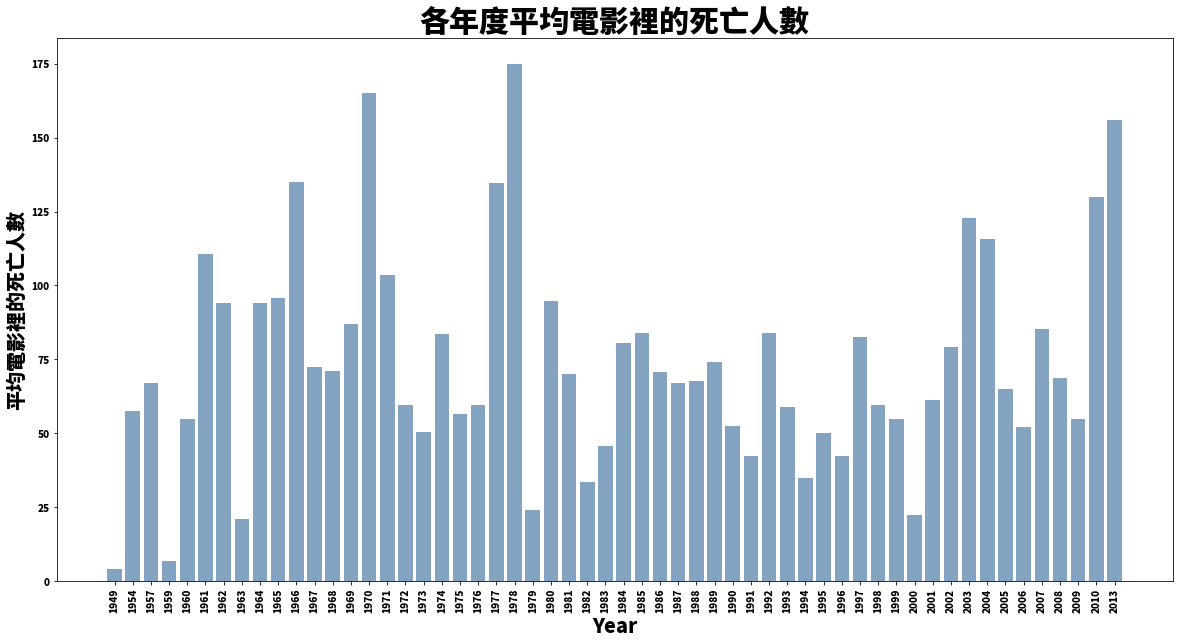

In [6]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(yearSection)), yearSection.Body_Count, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(len(yearSection)), yearSection.index.values,  rotation='vertical')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('平均電影裡的死亡人數', fontsize = 20)
plt.title('各年度平均電影裡的死亡人數', fontsize = 30)

### 觀察各年度平均每分鐘電影死亡人數

In [7]:
FilmData['Body_Count/Minute'] = FilmData.Body_Count / FilmData.Length_Minutes

Text(0.5,1,'各年度平均每分鐘電影裡的死亡人數')

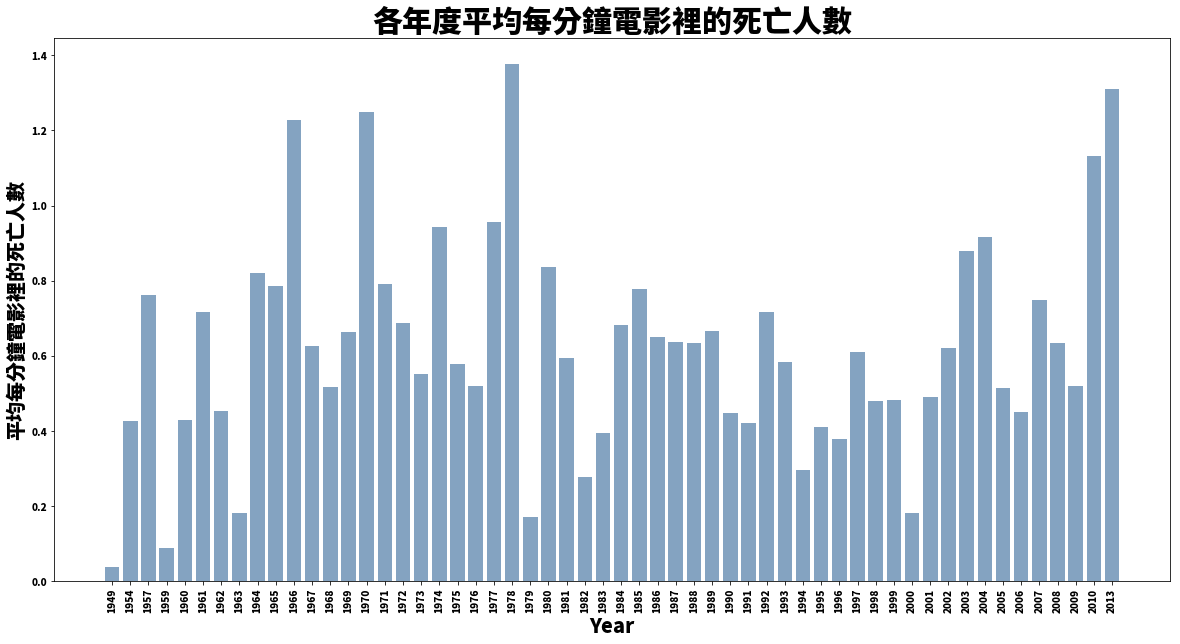

In [8]:
yearSection = FilmData.groupby('Year').mean()
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(yearSection)), yearSection['Body_Count/Minute'], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(len(yearSection)), yearSection.index.values,  rotation='vertical')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('平均每分鐘電影裡的死亡人數', fontsize = 20)
plt.title('各年度平均每分鐘電影裡的死亡人數', fontsize = 30)

### 觀察有多少種電影類型

In [9]:
category = pd.value_counts(FilmData.Genre)

In [10]:
new = FilmData["Genre"].str.split("|", expand = True)

In [11]:
partone = pd.value_counts(new.iloc[:,0])
parttwo = pd.value_counts(new.iloc[:,1])
partthree = pd.value_counts(new.iloc[:,2])
partfour = pd.value_counts(new.iloc[:,3])
partfive = pd.value_counts(new.iloc[:,4])
partsix = pd.value_counts(new.iloc[:,5])

category = partone.add(parttwo,fill_value=0)
category = category.add(partthree,fill_value=0)
category = category.add(partfour,fill_value=0)
category = category.add(partfive,fill_value=0)
category = category.add(partsix,fill_value=0)

category = category.sort_values()

Text(0,0.5,'電影數量')

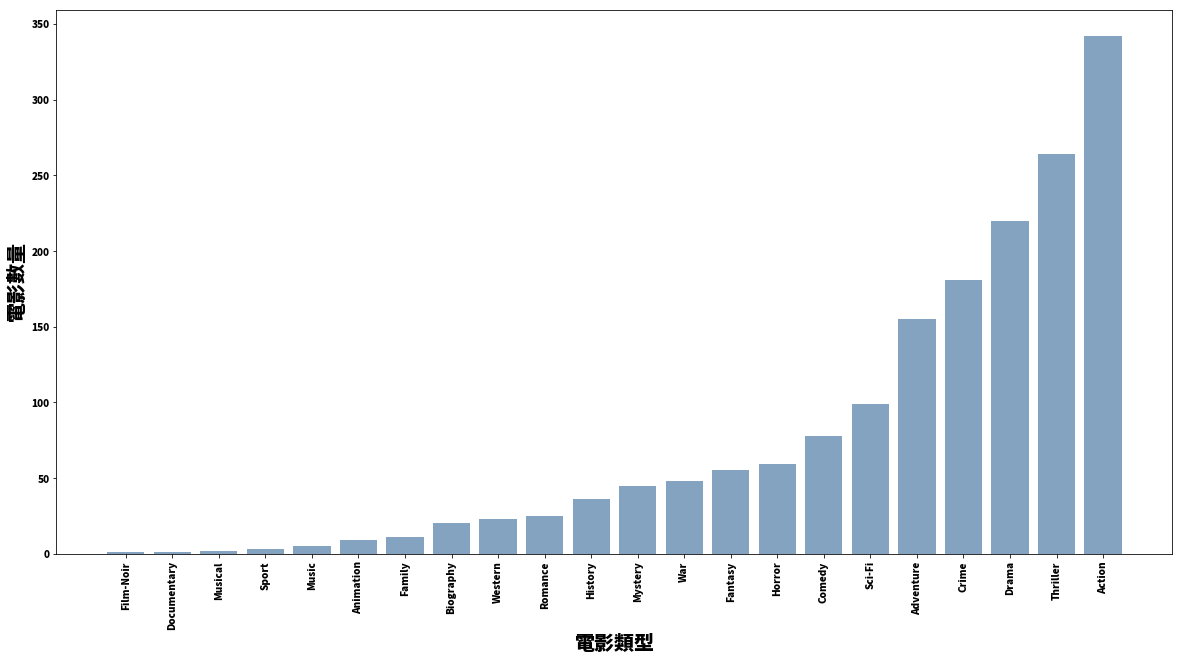

In [12]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), category, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(len(category)), category.index.values,  rotation='vertical')
plt.xlabel('電影類型', fontsize = 20)
plt.ylabel('電影數量', fontsize = 20)


#### 動作類型的電影數量最多，其次是恐怖電影和劇情片

In [13]:
new = pd.DataFrame(new)
category_body = pd.concat([new, pd.DataFrame(FilmData.Body_Count)],axis=1)

In [14]:
category_body.columns = ['first', 'second', 'third', 'forth', 'fifth', 'sixth', 'Body_Count']

In [15]:
partone = category_body.groupby('first').mean()
parttwo = category_body.groupby('second').mean()
partthree = category_body.groupby('third').mean()
partfour = category_body.groupby('forth').mean()
partfive = category_body.groupby('fifth').mean()
partsix = category_body.groupby('sixth').mean()

category_body = partone.add(parttwo,fill_value=0)
category_body = category_body.add(partthree,fill_value=0)
category_body = category_body.add(partfour,fill_value=0)
category_body = category_body.add(partfive,fill_value=0)
category_body = category_body.add(partsix,fill_value=0)

In [16]:
category_body = pd.DataFrame(category_body)
category = pd.DataFrame(category)

In [17]:
kindName = pd.DataFrame(category.index.values)
category.set_index(kindName.index)
category['kindName'] = kindName.values

In [18]:
kindName = pd.DataFrame(category_body.index.values)
category_body.set_index(kindName.index)
category_body['kindName'] = kindName.values

In [19]:
tempdata = pd.merge(category, category_body, on='kindName')
category_body_final = pd.DataFrame(tempdata.iloc[:,2] / tempdata.iloc[:,0])
category_body_final.index = tempdata.iloc[:,1]

Text(0,0.5,'電影中平均死亡人數')

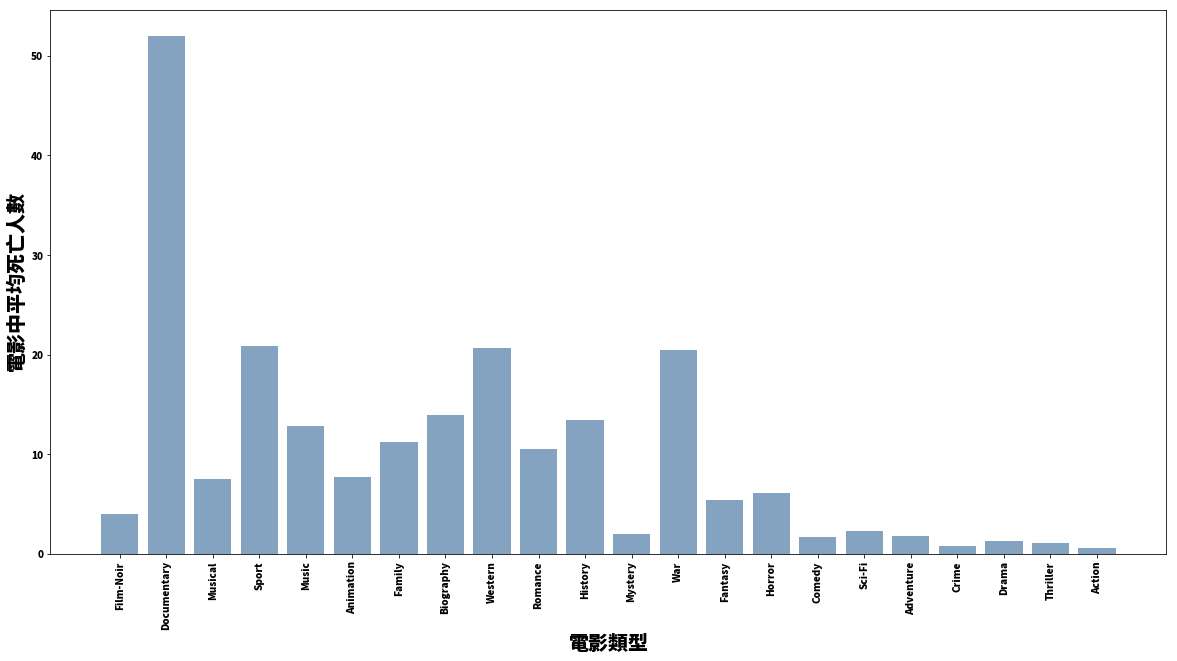

In [20]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category_body_final)), category_body_final.iloc[:,0], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(np.arange(len(category_body_final)), category_body_final.index.values,  rotation='vertical')
plt.xlabel('電影類型', fontsize = 20)
plt.ylabel('電影中平均死亡人數', fontsize = 20)

#### 可以發現平均而言，紀錄片的死亡人數是最多的，其次是運動片、西部片和戰爭片

### 電影評價和死亡數目的泡泡圖
* 有標出電影中死亡人數最多的前四部電影
* 泡泡越大代表該電影中的死亡人數越多
* 顏色越深代表該電影中的死亡人數越多

Text(0,0.5,'電影中平均每分鐘死亡人數')

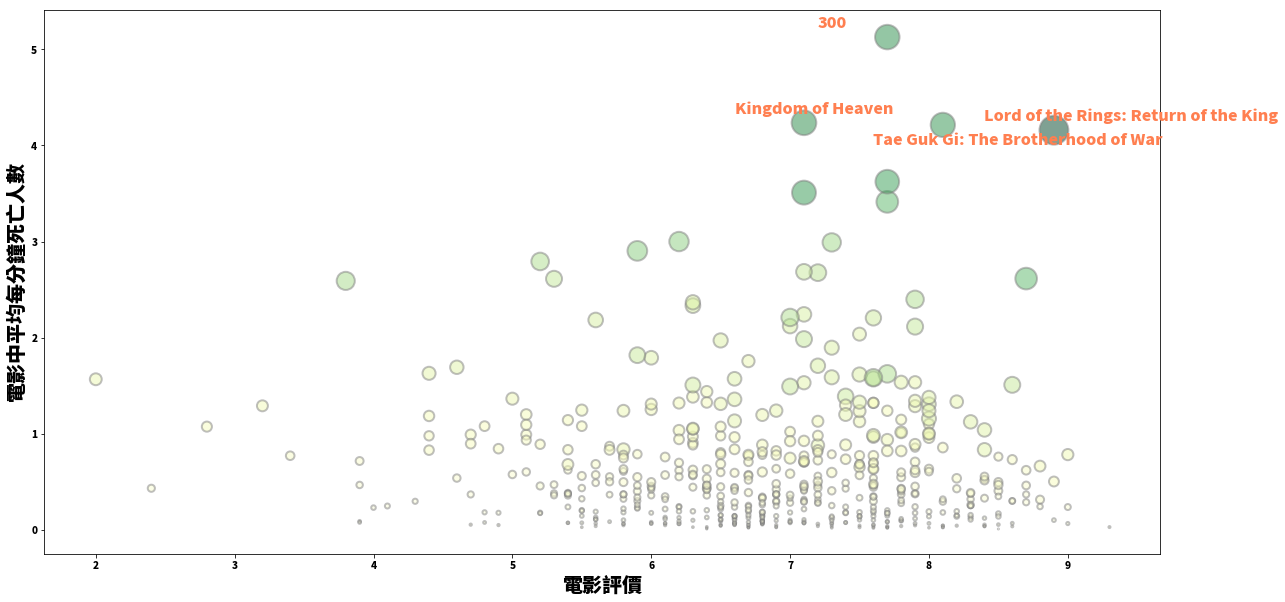

In [35]:
MaxBodyIndex = FilmData['Body_Count'].sort_values().tail(10).index.values
plt.figure(figsize=(20,10))
plt.scatter(FilmData['IMDB_Rating'], FilmData['Body_Count/Minute'], s = FilmData['Body_Count'],
            c = FilmData['Body_Count'], alpha=.5, cmap="YlGn",
           edgecolors = 'grey', linewidth = 2)

for i in range(7, 10):
    plt.text(FilmData.iloc[MaxBodyIndex[i],7] - 0.5, FilmData.iloc[MaxBodyIndex[i],8] + 0.1, FilmData.iloc[MaxBodyIndex[i],0],
        fontdict = {'size': 16, 'color':'coral'})
plt.text(FilmData.iloc[MaxBodyIndex[6],7] - 0.5, FilmData.iloc[MaxBodyIndex[6],8] - 0.2, FilmData.iloc[MaxBodyIndex[6],0],
        fontdict = {'size': 16, 'color':'coral'})
plt.xlabel('電影評價', fontsize = 20)
plt.ylabel('電影中平均每分鐘死亡人數', fontsize = 20)

#### 死亡數目和電影評級看起來是有一些關聯性的 

### 不同電影種類下，電影評價和電影中死亡人數的泡泡圖
* 因為圖片呈現關係，所以只顯示電影種類前十多的資料畫出來
* 不同顏色代表不同的電影種類
* 點越大，表示電影中死亡人數越多

In [27]:
filmKindTopTwenty = pd.value_counts(FilmData['Genre']).sort_values().tail(10).index.values

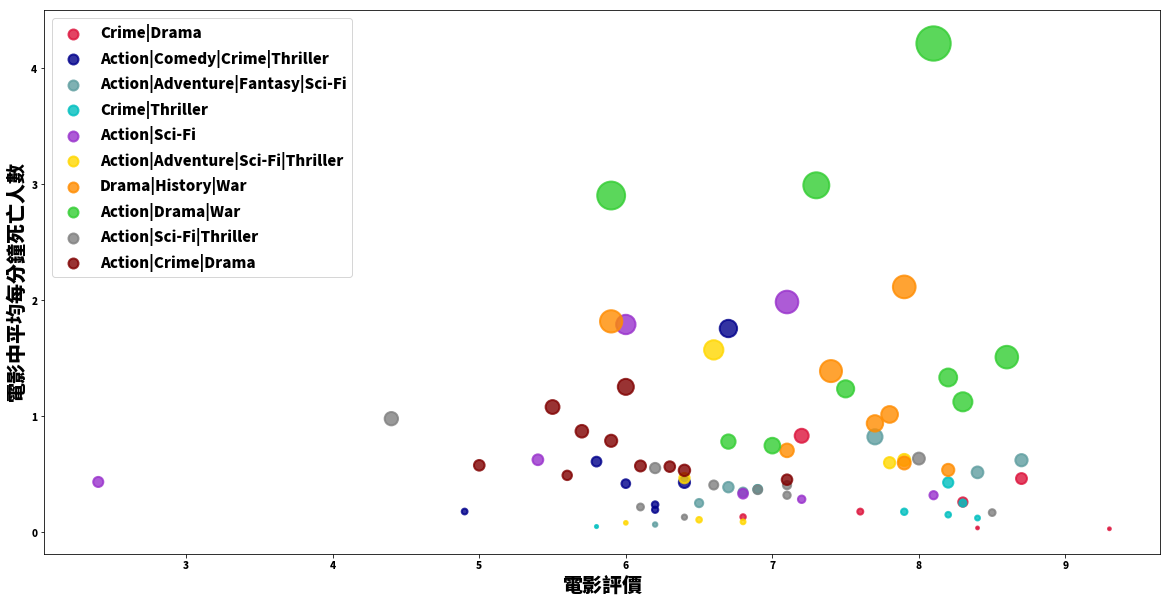

In [54]:
color = ['crimson', 'darkblue', 'cadetblue', 'c', 'darkorchid', 'gold', 'darkorange', 'limegreen', 'gray', 'maroon']

plt.figure(figsize=(20,10))
for i in range(0, 10):
    plotKindData = FilmData[FilmData['Genre'] == filmKindTopTwenty[i]]
    plt.scatter(plotKindData['IMDB_Rating'], plotKindData['Body_Count/Minute'], s = plotKindData['Body_Count'] * 2,
                c = color[i], alpha=.8, linewidth = 2, label = filmKindTopTwenty[i])
plt.xlabel('電影評價', fontsize = 20)
plt.ylabel('電影中平均每分鐘死亡人數', fontsize = 20)
#plt.legend(loc='upper left', markerscale=3)

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15)
for i in range(0, 10):
    lgnd.legendHandles[i]._sizes = [100]


### 電影長度、電影評價和電影中死亡人數的泡泡圖
* 泡泡越大代表該電影中的死亡人數越多
* 顏色越深代表該電影中的死亡人數越多

Text(0,0.5,'電影長度')

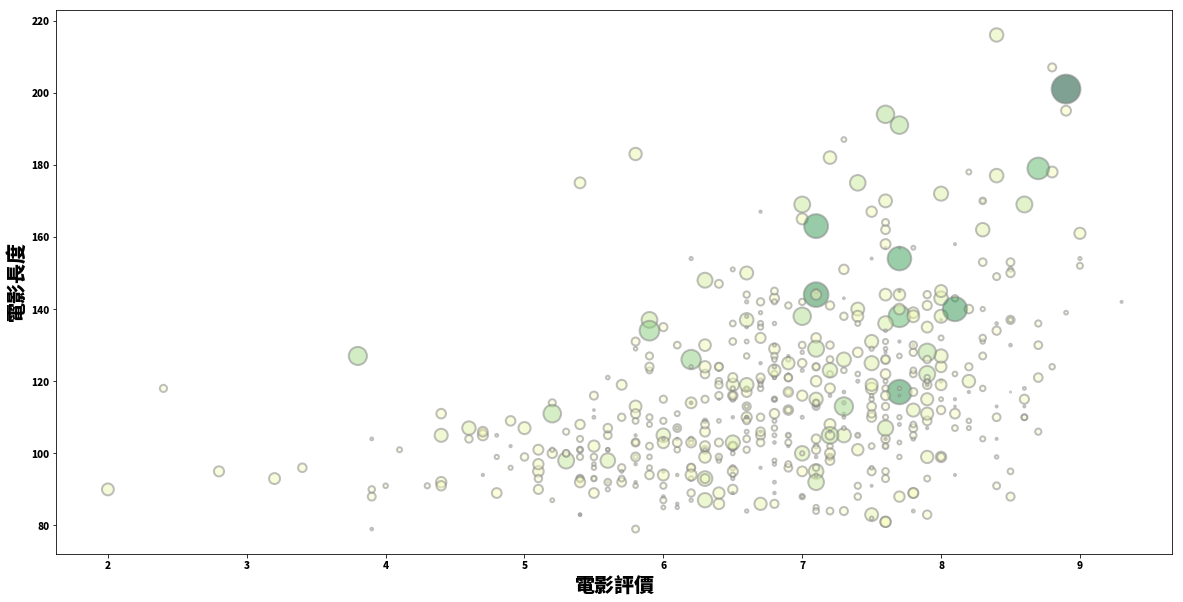

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(FilmData['IMDB_Rating'], FilmData['Length_Minutes'], s = FilmData['Body_Count'],
            c = FilmData['Body_Count'], alpha=.5, cmap="YlGn",
           edgecolors = 'grey', linewidth = 2)
plt.xlabel('電影評價', fontsize = 20)
plt.ylabel('電影長度', fontsize = 20)

#### 電影長度和電影評價也有一些關聯性存在

## 建立迴歸模型預測電影評價

In [55]:
# Create linear regression object
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
regr = LinearRegression()


In [56]:
xdata = FilmData[['Body_Count', 'Length_Minutes']]
ydata = FilmData[['IMDB_Rating']]

# split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.2, random_state = 100)


In [58]:
# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R Squared: %.2f' % regr.score(x_train, y_train))


Coefficients: 
 [[-0.00090914  0.02232052]]
Intercept: 
 [4.32105584]
Mean squared error: 1.15
Variance score: 0.20


In [60]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     6110.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.41e-318
Time:                        21:49:37   Log-Likelihood:                -727.78
No. Observations:                 436   AIC:                             1460.
Df Residuals:                     434   BIC:                             1468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Body_Count        -0.0025      0.001     -3.

In [61]:
yPred = result.predict(x_test)
mean_squared_error(y_test, yPred)

1.7806540443296792

* $x_1$: Body_Count(電影中死亡人數)
* $x_2$: Length_Minutes(電影長度)
* $\hat y$: IMDB
* 第一個模型是有截距項的迴歸： $\hat y = 4.32 - 0.0009 x_1 + 0.0223 x_2$
  
  R Squared 為 0.20
* 第二個模型沒有截距項的迴歸： $ \hat y =-0.0025 x_1  + 0.0591 x_2$
  
  Adj R Squared 為 0.96

In [ ]:
最後會選擇沒有截距項的迴歸式。